In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import linear_sum_assignment
import warnings

def plot_constraint(eq, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (eq[2] - eq[0] * x_values) / eq[1]
    plt.plot(x_values, y_values, label=f'{eq[0]}x + {eq[1]}y <= {eq[2]}', color=color)

def plot_objective_function(obj_func, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (obj_func[2] - obj_func[0] * x_values) / obj_func[1]
    plt.plot(x_values, y_values, label=f'{obj_func[0]}x + {obj_func[1]}y = {obj_func[2]}', linestyle='dashed', color=color)

def graphical_method(constraints, objective_function, problem_type):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)

        plt.figure(figsize=(8, 8))

        for i, constraint in enumerate(constraints):
            plot_constraint(constraint, color=f'C{i}')

        plot_objective_function(objective_function, color='black')

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()

        x_values = np.linspace(0, 10, 100)
        for i, constraint in enumerate(constraints):
            y_values = (constraint[2] - constraint[0] * x_values) / constraint[1]
            if problem_type == 'min':
                plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) <= constraint[2], color=f'C{i}', alpha=0.3)
            elif problem_type == 'max':
                plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) >= constraint[2], color=f'C{i}', alpha=0.3)

        c = objective_function[:2] if problem_type == 'min' else -np.array(objective_function[:2])
        res = linprog(c, A_ub=constraints[:, :2], b_ub=constraints[:, 2])

        print_results(res, problem_type)

        plt.show()

def print_results(result, problem_type):
    print("\n=== Results ===")
    if problem_type == 'min':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {result.fun:.2f}")
    elif problem_type == 'max':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {-result.fun:.2f}")


=== Results ===
Decision Variables (x, y): (1.14, 2.57)
Objective Value: 54.86


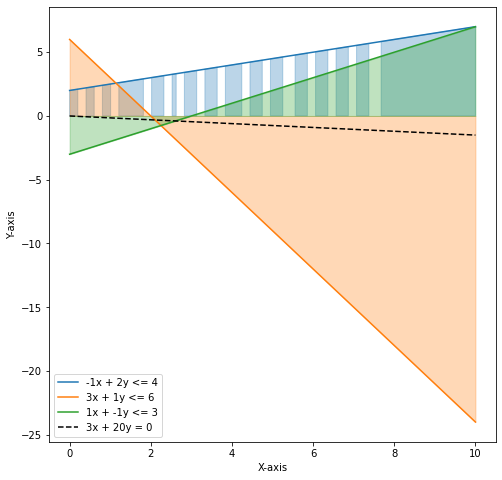

In [3]:
constraints_max = np.array([[-1, 2, 4], [3, 1, 6], [1, -1, 3]])
objective_function_max = [3, 20, 0]  
graphical_method(constraints_max, objective_function_max, 'max')


=== Results ===
Decision Variables (x, y): (0.00, 8.00)
Objective Value: 40.00


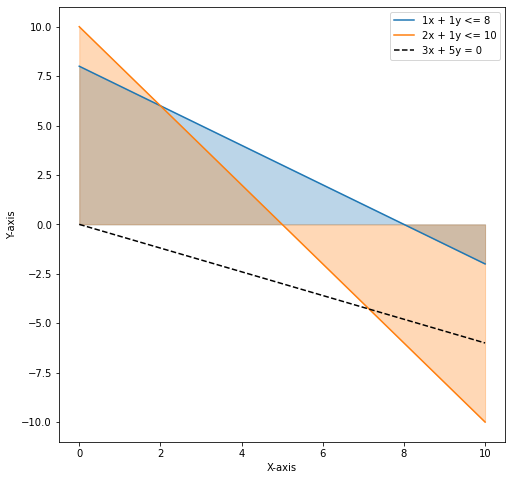

In [4]:
constraints_max = np.array([[1, 1, 8], [2, 1, 10]])
objective_function_max = [3, 5, 0]  
graphical_method(constraints_max, objective_function_max, 'max')


=== Results ===
Decision Variables (x, y): (1.37, 1.08)
Objective Value: 12.00


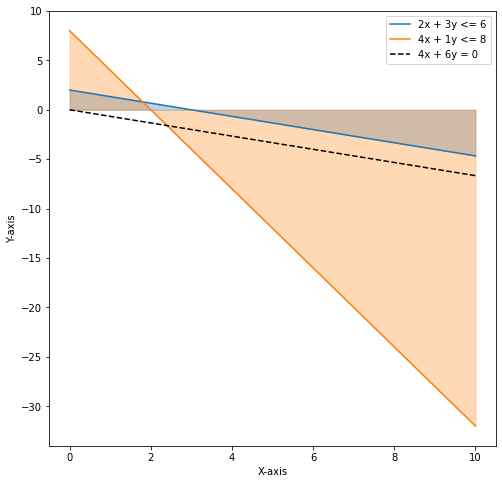

In [5]:
constraints_min = np.array([[2, 3, 6], [4, 1, 8]])
objective_function_min = [4, 6, 0] 
graphical_method(constraints_min, objective_function_min, 'max')